In [1]:
import sys
import os

os.chdir("../")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# How many times the cheapest proposed accomodation is picked by the user?  

In [3]:
df = pd.read_csv('dataset/original/train.csv')
df = df[df['action_type'] == 'clickout item']
df = df[~df['reference'].isnull()]

df_test = pd.read_csv('dataset/original/test.csv')
df_test = df_test[df_test['action_type'] == 'clickout item']
df_test = df_test[~df_test['reference'].isnull()]

df = pd.concat([df, df_test], ignore_index=True)

Text(0, 0.5, 'percentage of clickout')

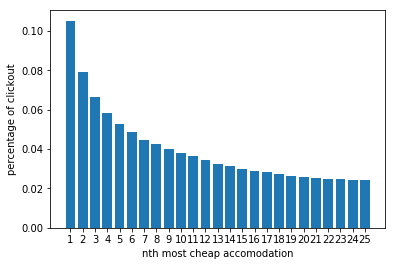

In [5]:
freq_item = np.zeros((25))
for index, row in df.iterrows():
    impression = list(map(int, row['impressions'].split('|')))
    prices = list(map(int, row['prices'].split('|')))
    clickout_item = int(row['reference'])
    impression_prices = [[impression[i], prices[i]] for i in range(len(impression))]
    impression_prices.sort(key=lambda x: int(x[1]))
    impression = [e[0] for e in impression_prices]
    if clickout_item in impression:
        idx = impression.index(clickout_item)
        freq_item[idx] = freq_item[idx] + 1
        
freq_item = freq_item/np.sum(freq_item)

x = np.arange(1,26)
plt.bar(x, height=list(freq_item)) 
plt.xticks(x)
plt.xlabel('nth most cheap accomodation')
plt.ylabel('percentage of clickout')

### More then 10% of the clickouts were done on the cheapest accomodation among the ones proposed. 

In [6]:
freq_item

array([0.10520523, 0.07913876, 0.06629763, 0.05856265, 0.05288581,
       0.04846644, 0.04485796, 0.04262893, 0.0401613 , 0.03793603,
       0.03639967, 0.03426038, 0.03251337, 0.03127848, 0.02990387,
       0.02872487, 0.02813268, 0.02726214, 0.02628626, 0.02575587,
       0.02525611, 0.02469939, 0.02483481, 0.02432699, 0.02422435])

# Do the statistics change if are considered the clickouts of users with no other clickouts?

In [19]:
def func(x):
    if len(x) == 1:
        idx = 0
        for index, row in x.iterrows():
            impression = list(map(int, row['impressions'].split('|')))
            prices = list(map(int, row['prices'].split('|')))
            clickout_item = int(row['reference'])
            impression_prices = [[impression[i], prices[i]] for i in range(len(impression))]
            impression_prices.sort(key=lambda x: int(x[1]))
            impression = [e[0] for e in impression_prices]
            if clickout_item in impression:
                idx = impression.index(clickout_item)

        d = {'position': [idx]}
        return pd.DataFrame(data=d)

In [26]:
grouped = df.groupby(['user_id']).apply(func)

### Not a significative difference

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca678b6518>]],
      dtype=object)

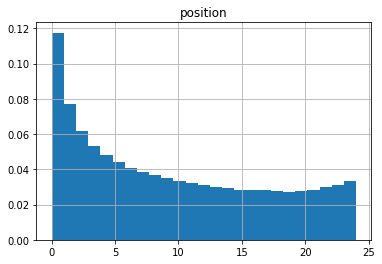

In [27]:
grouped.hist(column = 'position', bins = 25, weights = np.ones(len(grouped))/len(grouped))